# Numpy



In [ ]:
"relancez cette cellule quand vous voulez repartir de zéro"
%reset -f
import numpy as np

## Qu'est-ce?

Les listes python sont extensibles à volonté et peuvent contenir n'importe quoi. On les créer avec les crochets:`uneListe=[]`. Dans un cadre scientifique, pour des questions de performances, on travaille essentiellement avec `numpy` qui crée des tenseurs, c.à.d:

* des tableaux multi-dimensionnel 
* de taille fixée
* qui ne peuvent contenir qu'un seul type d'objet : `int` ou `float` (numpy gère d'autre types, mais on ne les utisera pas)
* rapidement manipulable dans leur ensemble (grace à des "boucles implicites")

L'ordre ou la dimension d'un tenseur, c'est son nombre d'indices:

* tenseur d'ordre 1 = vecteur, ex: pour stocker du son
* tenseur d'ordre 2 = matrice, ex: pour stocker une image
* tenseur d'ordre 3 = volume, ex: pour stocker une vidéo
* tenseur d'ordre 4 = très utile quand on fait du deep-learning sur des images


On précise l'affichage des tableau numpy :

* 3 décimales après la virgule
* on supprime la notation scientifique des nombres
* on veut de grandes lignes


In [ ]:
np.set_printoptions(precision=3,suppress=True,linewidth=5000)

## Type des données

Voici les principaux dtypes (=data-type)  que l'on  rencontre:

* `np.float64`= flottant sur 64 bit: c'est le dtype par défault pour stocker des valeurs réelles. 
* `np.int64`= entier signés sur 64 bits: : c'est le dtype par défault pour stocker des valeurs entière.
* `np.uint8`= entier positifs (unsigned) sur 8 bits:  on les obtient quand on importe  des images `png` ou `jpeg`. Les pixels prennent des valeurs de 0 à 255
* `np.float32`, `np.int32`: la bibliothèque `tensorflow` qui permet de faire du deeplearning est par défaut sur 32 bit: pour économiser de la place mémoire. 

### Tableau de flotant

In [ ]:
"""un vecteur initialisé par une liste de valeurs. """
vec=np.array([1.,2,3,4])
"""une matrice"""
mat=np.array([ [1.,2,0],[3,4,0]])
"notez qu'on a mis au moins un coefficient flottant (avec un point)"

print("vec\n",vec)
print("mat\n",mat)

vec
 [1. 2. 3. 4.]
mat
 [[1. 2. 0.]
 [3. 4. 0.]]


Les principales caractéristiques d'un tableau sont:

* `dtype` = data-type
* `shape` = sa forme

In [ ]:
print("vec:",vec.dtype,vec.shape)
print("mat:",mat.dtype,mat.shape)

vec: float64 (4,)
mat: float64 (2, 3)


In [ ]:
"""vecteur de flotant initialisé à 0, matrice de flottant initialisé à 1"""
vec_zero=np.zeros(shape=[5])
mat_un=np.ones(shape=[5,4])
print("\n vec_zero\n",vec_zero)
print("\n mat_un \n",mat_un)


 vec_zero
 [0. 0. 0. 0. 0.]

 mat_un 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Tableau d'entier

Attention, depuis python 3, les indices de tableau doivent nécessairement être des entiers. Par exemple `tenseur[3.0]` renvoie une erreur.  

Du coup, si l'on veut faire un tableau qui contiens plusieurs indices, il faut créer un tableau d'entier. C'est quasiment le seul cas où l'on va utiliser de tels tableaux.

In [ ]:
indices=np.array([0,3,1])
vec = np.array([0.,2,4,6,8,10])
print(indices)
print(indices.dtype)
print(vec[indices])

[0 3 1]
int64
[0. 6. 2.]


In [ ]:
"""convertissons"""
vec=np.array([1.5,2.5,3.5,4.5])
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.int64)
print(vec," dtype:",vec.dtype)
vec=vec.astype(np.float64)
print(vec," dtype:",vec.dtype)


[1.5 2.5 3.5 4.5]  dtype: float64
[1 2 3 4]  dtype: int64
[1. 2. 3. 4.]  dtype: float64


***Exo :*** modifiez $(1\heartsuit)$ le vecteur `indices` ci-dessus, pour qu'il contienne des flottant. Indiquez le message d'erreur qui en découle.  

## Opérations élément par élément

La plupart des opérations sur les tenseurs se font élément par élément à l'aide d'une boucle implicite très rapide. Par exemple tenseur1 * tenseur2 effectue la multiplication terme à terme (et non pas une multiplication matricielle). 



### Exemples

In [ ]:
"""toutes ces opérations sur les tenseurs sont faites terme à terme."""

vec = np.array([1., 2, 3, 4])
vec_carre = vec**2
vec2= vec+vec_carre
vec3=7*vec
vec4=np.sin(vec)
vec5=vec2*vec3


print("vec",vec)
print("vec_carre",vec_carre)
print("vec2",vec2)
print("vec3",vec3)
print("vec4",vec4)
print("vec5",vec5)

vec [1. 2. 3. 4.]
vec_carre [ 1.  4.  9. 16.]
vec2 [ 2.  6. 12. 20.]
vec3 [ 7. 14. 21. 28.]
vec4 [ 0.841  0.909  0.141 -0.757]
vec5 [ 14.  84. 252. 560.]


Voici un exemple très classique de utilisation d'une fonction numpy

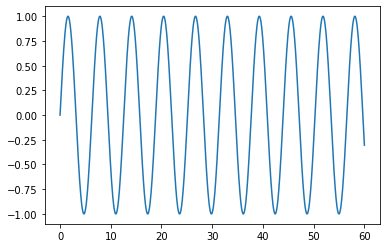

In [ ]:

import matplotlib.pyplot as plt
x=np.linspace(0,60,1000)
y=np.sin(x)
plt.plot(x,y);

### performances

Comparons les performances entre une boulce implicite et une boucle explicite

In [ ]:
a=np.random.randint(0,100,size=1000000)
b=np.random.randint(0,100,size=1000000)

In [ ]:
%%time
"""
%%time : Pour calculez le temps d'une celle entière
%time  : Pour calculez le temps d'une seule ligne de code
"""
"boucle implicite"
c=a*b
print("premières valeurs:\n",c[:10])

premières valeurs:
 [1649 3339 3772 8188  198 5168  826  215 6004 4884]
CPU times: user 4.48 ms, sys: 0 ns, total: 4.48 ms
Wall time: 3.74 ms


In [ ]:
%%time
c=np.empty(len(a))
"boucle explicite"
for i in range(len(a)):
  c[i]=a[i]*b[i]
print("premières valeurs:",c[:10])

premières valeurs: [1649. 3339. 3772. 8188.  198. 5168.  826.  215. 6004. 4884.]
CPU times: user 582 ms, sys: 929 µs, total: 583 ms
Wall time: 588 ms


### numpy effectue des copies

La plupart des fonctions numpy ne modifient pas l'argument de départ: une 'copie' est faite. 

In [ ]:
vec = np.array([1., 2, 3, 4])
vec1=vec**2
vec2=np.sin(vec)

print(vec.round())
print(vec1)
print(vec2)

"""vec n'a pas changer"""
print("vec",vec)

[1. 2. 3. 4.]
[ 1.  4.  9. 16.]
[ 0.841  0.909  0.141 -0.757]
vec [1. 2. 3. 4.]


Une exception naturelle:

In [ ]:
" ici l'espace mémoire de `vec` est réutilisé pour stocker `2*vec`"
vec*=2
print(vec)

[2. 4. 6. 8.]


### Syntaxe objet ou fonctionnelle

De nombreuses fonctions numpy peuvent s'utiliser avec deux syntaxes différentes : 
        
1. `np.fonction(tenseur)`
        
2. `tenseur.fonction()`

Et même dans le second cas, une copie du tenseur est faites ; c'est un peu trompeur car la syntaxe objet `tenseur.fonction()` suggère en générale une opération modifiant l'objet (opération "inPlace")

In [ ]:
vec = np.array([1.1234, 2.1234, 3.1234, 4.1234])

"""arrondir"""
vec1= np.round(vec,1)
"""idem avec syntaxe différente"""
vec2= vec.round(1)

print("vec1", vec1)
print("vec2", vec2)


"""vec n'a pas changer (cependant il ne s'affiche qu'avec 3 décimales à cause de notre entête)"""
print("vec", vec)



vec1 [1.1 2.1 3.1 4.1]
vec2 [1.1 2.1 3.1 4.1]
vec [1.123 2.123 3.123 4.123]


### Exo

Pensez à utiliser la complétion automatique pour voir quelles sont les fonctions disponibles. Par exemple tapez `np.a` suivit de la touche tabualtion. 
Utilisez cela pour tracer les fonctions

* arccosinus $(1\heartsuit)$
* arctangeante $(1\heartsuit)$
* la partie entière (il faut savoir dire "sol" en anglais) $(1\heartsuit)$
* cosinus hyperbolique $(1\heartsuit)$
* logarithme népérien $(1\heartsuit)$
* logarithme en base 10 $(1\heartsuit)$

Retenez aussi une fonction particulière : `np.arctan2(x,y)` qui permet de renvoyer l'angle alpha du point de coordonnée (x,y)

## Jouer avec les axes $\flat$

Pour les tenseurs de dimension $\geq 2$, on peut faire des opérations en suivant un axe donnée. Commençons par observer cela sur des matrices (dim=2). 

### lignes et colonnes

La convention pour numéroter les lignes et les colonnes est la même qu'en mathématiques

In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print(mat)

[[ 1  2  3]
 [-1 -2 -3]]


In [ ]:
"on ajoute des étiquettes pour clarifier. On utiliser la bibliothèque pandas pour cela."
import pandas as pd
df=pd.DataFrame(mat,index=["i=0","i=1"],columns=["j=0","j=1","j=2"])
df

,j=0,j=1,j=2
i=0,1,2,3
i=1,-1,-2,-3


In [ ]:
print("sum_ij mat[i,j]:\n",np.sum(mat))
print("sum_i mat[i,j]:\n",np.sum(mat,axis=0))
print("sum_j mat[i,j]:\n",np.sum(mat,axis=1))

sum_ij mat[i,j]:
 0
sum_i mat[i,j]:
 [0 0 0]
sum_j mat[i,j]:
 [ 6 -6]


In [ ]:
v1=np.array([10,20,30])
v2=np.array([100,200,300])
print("empilons le long de i:\n",np.stack([v1,v2],axis=0))
print("empilons le long de j:\n",np.stack([v1,v2],axis=1)) 

empilons le long de i:
 [[ 10  20  30]
 [100 200 300]]
empilons le long de j:
 [[ 10 100]
 [ 20 200]
 [ 30 300]]


In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
mat2=np.array([[10,20],[30,40]])
print("mat2:\n",mat2)
print("concaténons en ralongeant l'axe des j:\n",np.concatenate([mat,mat2],axis=1))

mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat2:
 [[10 20]
 [30 40]]
concaténons en ralongeant l'axe des j:
 [[ 1  2  3 10 20]
 [-1 -2 -3 30 40]]


Dans l'exemple précédent, on n'aurait pas pu concaténer avec `axis=0`. On aurait eu le message d'erreur: *all the input array dimensions except for the concatenation axis must match exactly* 

In [ ]:
print("max_j mat[i,j]:\n",np.max(mat,axis=1)) 
print("argmax_j mat[i,j]:\n",np.argmax(mat,axis=1)) 

max_j mat[i,j]:
 [ 3 -1]
argmax_j mat[i,j]:
 [2 0]


Attention, quand on ne précise pas les axes, l'opération par défaut n'est pas toujours très claire: c'est parfois `axis=0` ou c'est parfois "celon tous les axes" comme `np.sum`.

### Reshape

In [ ]:
a=np.arange(0,12,1)
print("a:\n",a)
print("a.reshape([2,6]):\n",a.reshape([2,6]))
"le -1 signifie: 'adapte la dimension' "
print("a.reshape([2,-1)]):\n",a.reshape([2,-1]))
print("a.reshape([2,2,3]):\n",a.reshape([2,2,3]))

a:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
a.reshape([2,6]):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
a.reshape([2,-1)]):
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
a.reshape([2,2,3]):
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [ ]:
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
print("mat:\n",mat.reshape([-1]))




mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat:
 [ 1  2  3 -1 -2 -3]


### Broadcasting

Le broadcasting c'est le fait de faire des opérations entre tenseurs de shape différentes. C'est une opération que l'on fait naturellement en math, par exemple quand on écrit:
$$
\sum_j  mat[i,j] \, vec[j]
$$

In [ ]:
np.random.seed(0)
# 1 - 4, 1-3, 2
A = np.random.randint(0, 10, [2, 3])
B = np.ones((2,3))

In [ ]:
A

array([[5, 0, 3],
       [3, 7, 9]])

In [ ]:
B

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
A + B

array([[ 6.,  1.,  4.],
       [ 4.,  8., 10.]])

In [ ]:
v=np.array([1,10])
"transformons `v` en matrice colonne, observons le à côté de la matrice `mat` "
vv=v.reshape([2,1]) 
print(vv)
print(mat)

[[ 1]
 [10]]
[[ 1  2  3]
 [-1 -2 -3]]


In [ ]:
" on les multiplie ensemble: "
print(vv*mat)

[[  1   2   3]
 [-10 -20 -30]]


Ainsi on a répéter la matrice `vv` trois fois en colonne avant de le multiplier terme à terme. C'est encore plus naturel si on utilise la syntaxe avec `newaxis` (qui fait la même chose que le `reshape` précédent). 

In [ ]:
"calculons : v[i]*mat[i,j]"
print(v[:,np.newaxis]*mat)

[[  1   2   3]
 [-10 -20 -30]]


***A vous:*** En utilisant le broadcasting, calculez $(2\heartsuit)$ le produit matriciel w . mat avec `w = np.array([0,10])`.

Même si on n'aime pas faire du broadcasting, quand on récupère du code sur internet, on peut tomber dessus: et parfois il est caché! 

In [ ]:
"cas élémentaire: ajout d'un scalaire à une matrice: le scalaire est répété"
mat=np.array([[1,2,3],[-1,-2,-3]])
print("mat:\n",mat)
print("mat+3:\n",mat+3)

mat:
 [[ 1  2  3]
 [-1 -2 -3]]
mat+3:
 [[4 5 6]
 [2 1 0]]


In [ ]:
vec=np.array([0,10,-10])
print("vec:\n",vec)
print("mat+vec:\n",mat+vec)

vec:
 [  0  10 -10]
mat+vec:
 [[  1  12  -7]
 [ -1   8 -13]]


***A vous:*** $(1\heartsuit)$ Qu'elle extention est-elle fait par défaut?  Changez `vec=np.array([0,10,-10])` en `vec=np.array([0,10])`,  lissez le message d'erreur. 

## Modifier un tenseur 



### Directement

In [ ]:
vec = np.array([1., 2, 3, 4])
mat = np.array([[1., 2], [3, 4]])

"""modifier un élément"""
vec[0] = 10.  # la numérotation commence à zéro
mat[1, 1] = 10.

""" attention, on a ainsi modifier les objets initiaux"""
print("vec et mat après modification")
print(vec)
print(mat)

"""modifier un bloc d'élément"""
vec_zero = np.zeros(shape=[5])
vec_zero[0:3]=5 # [0:3] indique les indices dans l'intervalle [0,3[

mat_un = np.ones(shape=[5, 4])
mat_un[0:2,0:3]=7

print("\nvec_zero\n", vec_zero)
print("\nmat_un\n", mat_un)

vec et mat après modification
[10.  2.  3.  4.]
[[ 1.  2.]
 [ 3. 10.]]

vec_zero
 [5. 5. 5. 0. 0.]

mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Via une 'vue' sur les données $\sharp$

Attention, on touche ici à une des grandes difficultés de `numpy`; difficulté qu'on retrouve partout en informatique: le passage de données par copie ou par référence.  

In [ ]:
mat_un = np.ones(shape=[5, 4])

part=mat_un[0:2, 0:3]
"""toute la partie est mise à 7"""
part[:,:]=7

"""et là, observez : c'est à la fois logique et surprenant:"""
print("\n mat_un\n", mat_un)
print("\n part\n", part)


 mat_un
 [[7. 7. 7. 1.]
 [7. 7. 7. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

 part
 [[7. 7. 7.]
 [7. 7. 7.]]


Comment ça marche :

        mat_un = np.ones(shape=[5, 4])
        
L'ordi crée un tableau dans la mémoire de l'ordinateur. la variable 'mat_un' est une vue (=référence) sur ce tableau.
        
        part=mat_un[0:2, 0:3]
        
la variable 'part' est une vue sur une partie de ce tableau en mémoire. en effectuant :
        
        part[:,:]=7
        
on modifie une partie du tableau en mémoire. 

Par contre quand on fait :
        
        a=mat_un[0,0]
        
la variable `a` contient une copie du coefficient `mat_un[0,0]`. Modifier `a` ne modifie pas le tableau en mémoire. La preuve :

In [ ]:
mat_un = np.ones(shape=[5, 4])
a=mat_un[0,0]
a=7
print('a=',a)
print("\n mat_un\n", mat_un)

a= 7

 mat_un
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Exo

Que sont les tenseurs a,b,c,.... ci-dessous $(4\diamondsuit)$?
Mettez la réponse sur papier,  avant de vérifier avec un print `print`. 
Tachez de distinguer  la matrice ligne `[[1,2,3]]` du vecteur `[1,2,3]`,  le scalaire `3` au vecteur `[3]` etc.

In [ ]:
"""remplissons une matrice par une double boucle"""
nbLigne = 3
nbColonne = 4
mat = np.empty([nbLigne, nbColonne],dtype=np.int64)
for i in range(nbLigne):
    for j in range(nbColonne):
        mat[i, j] = i + j

print("\nmat \n",mat)

a = mat[0, :]
aBis = mat[0:1, :]
b = mat[:,0]
c = mat[:, nbColonne - 1]
d = mat[:,  - 1]  # ça: c'est idem que la ligne précédente
e = mat[-1,-1]
f = mat[0:2,:]
g = mat[0:2, 0:1]


mat 
 [[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]]


## Sélection par valeurs



### Via les tableaux de booléens

In [ ]:
a=np.array([0.,1.,2,3,4,-1])
print(a)
print(a<0)
print(a>=0)
print(a[a<0])
print(a[a>=0])
print(a[a==0])
""" le 'and' et 'or' dans les indices n'est pas le même que les 'and' et 'or' classiques"""
print(a[(a>0)&(a<4)])
print(a[(a>0)|(a<4)])

[ 0.  1.  2.  3.  4. -1.]
[False False False False False  True]
[ True  True  True  True  True False]
[-1.]
[0. 1. 2. 3. 4.]
[0.]
[1. 2. 3.]
[ 0.  1.  2.  3.  4. -1.]


Contrairement à la selection par indice (ex : `a[:,2]`), la selection par valeur créer une "copie", donc préserve l'originale.

In [ ]:
a=np.array([0.,1.,2,3,4,-1])
b = a[a >= 0]
b[:] = 10
print('b',b)
""" 'a'  n'a pas changé, ouf. """
print('a',a)

b [10. 10. 10. 10. 10.]
a [ 0.  1.  2.  3.  4. -1.]


***Important:*** Quand on a un doute sur 'copie' ou 'référence', on teste, comme ci-dessus.

### Via des conditions

Pour sélectionner des éléments dans un tableau selon un critère complexe,
il faut faire une boucle, et utiliser une liste car on ne sait jamais combien d'élément on va sélectionner à l'avance. 

In [ ]:
nbSimu=1000
a=np.random.randint(0,100,nbSimu)
res=[]
for i in range(nbSimu):
    if a[i]%3==0 and a[i]%7==0: 
      res.append(a[i])
"""à la fin, on repasse le résultat en tableau numpy"""
res=np.array(res)
print(res)

[21  0  0 42  0 42 84  0 42 21  0  0 42 21 84  0 84 21  0 63 63 42  0 84  0 42 63  0 84 84  0 21  0  0 21 21 42 63 84 42  0  0 21 63  0 84  0 63 21]


## Algèbre linéaire $\flat$

Attention, en numpy les vecteurs, les matrices lignes et les matrices colonnes sont des objets différents:

* vecteur.shape = (?)
* matrice_ligne.shape = (1,?)
* matrice_colonne.shape = (?,1)
* matrice_quelconque.shape = (?,?)

Observez bien les sorties consoles: les vecteurs s'écrivent avec 1 crochet, les matrices avec 2 crochets.

### Multiplication matricielle

`np.matmul()` s'applique uniquement entre matrices.

In [ ]:
size=3
mat_col=np.ones(shape=[size,1])
mat_lin=np.ones(shape=[1,size])
mat_square=np.ones(shape=[size,size])

print("mat_col\n",mat_col)
print("mat_lin\n",mat_lin)
print("mat_square\n",mat_square)

print("mat_square .  mat_col\n",np.matmul(mat_square,mat_col) )
print("mat_lin . mat_square\n",np.matmul(mat_lin,mat_square))
print("mat_lin . mat_square . mat_col\n", np.matmul(np.matmul(mat_lin,mat_square),mat_col))


mat_col
 [[1.]
 [1.]
 [1.]]
mat_lin
 [[1. 1. 1.]]
mat_square
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
mat_square .  mat_col
 [[3.]
 [3.]
 [3.]]
mat_lin . mat_square
 [[3. 3. 3.]]
mat_lin . mat_square . mat_col
 [[9.]]


sinon on peut utiliser `np.dot()` qui permet les multiplications matrice $\times$ vecteur, matrice $\times$ matrice, vecteur $\times$  vecteur (=produit scalaire)

In [ ]:
size=3
vec0=np.ones(shape=[size])
vec1=2*np.ones(shape=[size])
mat_square=np.ones(shape=[size,size])

print("vec0 . vec1\n",np.dot(vec0,vec1))
print("vec0 . mat_square\n",np.dot(vec0,mat_square))
print("mat_square . vec0\n",np.dot(mat_square,vec0))
print("mat_square . mat_square\n",np.dot(mat_square,mat_square))

vec0 . vec1
 6.0
vec0 . mat_square
 [3. 3. 3.]
mat_square . vec0
 [3. 3. 3.]
mat_square . mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


et si vous avez python 3.5+, vous pouver utilisez l'opérateur @ qui rend les codes plus lisibles

In [ ]:
print("vec0 @ vec1\n",vec0 @ vec1)
print("vec0 @ mat_square\n",vec0 @ mat_square)
print("mat_square @ vec0\n",mat_square @ vec0)
print("mat_square @ mat_square\n",mat_square @  mat_square)

vec0 @ vec1
 6.0
vec0 @ mat_square
 [3. 3. 3.]
mat_square @ vec0
 [3. 3. 3.]
mat_square @ mat_square
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


***Exo:*** Multipliez $(2\heartsuit)$ matriciellement des matrices de taille non-compatible.
Extrayez la partie intéressante du message d'erreur.

### Inverse et transposée 

Notez que le pseudo-inverse permet d'inverser les matrices non-inversibles (testez). 

In [ ]:
size=3
mat=np.zeros(shape=[size,size])
for i in range(size):
    mat[i,i]=1
mat[0,size-1]=2


print("mat\n",mat )
print("mat^T\n",mat.T)
print("mat^(-1)\n",np.linalg.inv(mat))
print("mat^(-1)-pseudo-inverse\n",np.linalg.pinv(mat))

mat
 [[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 1.]]
mat^T
 [[1. 0. 0.]
 [0. 1. 0.]
 [2. 0. 1.]]
mat^(-1)
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
mat^(-1)-pseudo-inverse
 [[ 1.  0. -2.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


### Vecteur propre et valeur propre

Souvenez-vous qu'en anglais valeur/vecteur 'propre' c'est 'eigen' value/vector

In [ ]:
size=4
"""une matrice aléatoire auquel on fait subir une opération de normalisation (laquelle?)"""
mat=np.random.uniform(low=0,high=10,size=[size,size])
rowSum=np.sum(mat,axis=1)
""" mat[i,j]=mat[i,j]/rowSum(i)  """
for i in range(size): mat[i,:]/=rowSum[i]

eigVal,eigVec=np.linalg.eig(mat)
print("\nmat\n", mat )
print("\neigVal\n",np.real(eigVal))
print("\neigVec\n", np.real(eigVec))


mat
 [[0.159 0.757 0.008 0.076]
 [0.297 0.184 0.046 0.473]
 [0.423 0.128 0.223 0.226]
 [0.315 0.599 0.062 0.025]]

eigVal
 [ 1.     0.151 -0.139 -0.422]

eigVec
 [[-0.5    0.172 -0.717  0.658]
 [-0.5    0.009  0.254 -0.532]
 [-0.5   -0.985  0.612 -0.435]
 [-0.5   -0.012  0.217  0.31 ]]


***A vous:*** 

* Pour la `mat` précédent: pourquoi 1 est-il valeur propre $(2\heartsuit)$? Quel est le vecteur propre associé $(1\heartsuit)$? 

* `np.linalg.eig` donne-t-il les vecteurs propres à droite ou à gauche $(1\heartsuit)$? Sont-ils disposés en ligne ou bien en colonne $(1\heartsuit)$?

* De manière générale, toutes les matrices sont-elles diagonalisables $(1\heartsuit)$?  A quoi servent les `np.real()` dans le programme précédent $(1\heartsuit)$?  

* laquelle de ces deux formules est la bonne $(1\heartsuit)$?

        Diag = P^-1 @ mat @ P   

ou

        Diag = P @ mat @ P^-1
        
Vérifiez avec python. Aide: Pour transformez un vecteur en matrice diagonale, utilisez `np.diag(vecteur)`

## Application :   loi forte des grands nombres

### Illustration graphique
***Théorème:*** Soit $(X_n)$ une suite de v.a, qui admet une espérance, on a: 
$$
\lim_n \frac 1 n  (X_0+....+X_{n-1}) =  \mathbf E[X_0]
$$

Remarque : pour illustrer ce théorème, on va tracer la courbe 
$$
   n \to  \frac 1 n  (X_0+....+X_{n-1})
$$
mais on n'est pas obligé de l'évaluer pour tous les $n$ (ex: on peut aller par pas de 40)

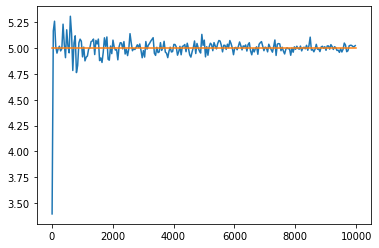

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

""" np.arange c'est comme range() sauf que cela donne un tableau numpy"""
n_max=10000
ns=np.arange(10,n_max,40)
means=[]
for n in ns:
    simus=np.random.uniform(0,10,size=n)
    means.append(np.mean(simus))

fig,ax=plt.subplots()
ax.plot(ns,means)
ax.plot([0,n_max],[5,5]);

***A vous:*** $(3\heartsuit)$ J'ai volontairement fait une erreur dans le programme précédent, une erreur que font beaucoup d'étudiant chaque année. Relisez attentivement la loi des grands nombre, comparez cet énoncé avec le programme ci-dessus. Trouvez le bug.

### Illustration numérique

In [ ]:
nbSimu = 10000
"""un échantillon de va de loi uniforme sur [0,1]"""
X1 = np.random.random(size=nbSimu)
""" un échantillon de va de loi normale (=gaussienne), centrée réduite par défaut.   """
X2 = np.random.normal(size=nbSimu)
""" un échantillon de va de loi de Poisson"""
X3 = np.random.poisson(1, size=nbSimu)

print(len(X1[X1<0.7])/nbSimu,"valeur attendue:",0.7)
print(sum( (X1-0.5)**2)/nbSimu,"valeur attendue:",1/12)
print(len(X2[X2<0.])/nbSimu,"valeur attendue:",0.5)



0.6973 valeur attendue: 0.7
0.08348008125317427 valeur attendue: 0.08333333333333333
0.4996 valeur attendue: 0.5


Donnez ci-dessus les valeurs attendue, et révisez ainsi votre loi de Poisson $(3\times 1\heartsuit)$.

In [ ]:
print(np.sum(X2**2)/nbSimu,"valeur attendue:")
print(len(X3[X3==3])/nbSimu,"valeur attendue:")
print(len(X3[X3!=0])/nbSimu,"valeur attendue:")

0.9944552041938416 valeur attendue:
0.0644 valeur attendue:
0.6375 valeur attendue:


### Monte carlo


***A vous:***  à l'aide de variables uniformes, en utilisant la loi forte des grands nombres, estimez  $(3\times 2\heartsuit)$ les intégrales suivantes:
$$
 \int_0^1  x \ dx  \qquad \text{et} \qquad  \int_0^{\frac 12 }  \frac x {\ln(x)}\  dx \qquad \text{et} \qquad  \int_0^1 \frac  1 x\  dx
$$   
Cette méthode pour calculer des intégrales est appelée : Méthode de Monte Carlo


## Application : moyenne et écart-type

Simulons des échantillons:

In [ ]:
nbData=100
X1=np.random.random(size=nbData)
X2=np.random.normal(size=nbData);

* calculons leur moyenne, qu'on peut  appeler : `mu_hat` (`mu` pour espérance, et `hat` pour estimation)
* calculons leur écart type empirique : `sigma_hat`



In [ ]:
print("loi uniforme sur [0,1]")
print("* mu_hat",X1.mean())
print("* sigma_hat",X1.std())

print("loi normale")
print("* mu_hat", X2.mean())
print("* sigma_hat", X2.std())

loi uniforme sur [0,1]
* mu_hat 0.5024284976752623
* sigma_hat 0.29961441559030433
loi normale
* mu_hat 0.011267812839176015
* sigma_hat 1.0073665045190698


A l'aide des estimateurs, vérifiez expérimentallement les résultats suivants $(4\times 2\heartsuit)$:

* l'espérance de la somme de deux variables aléatoires c'est la somme des espérances.
* la variance de la somme de deux variables aléatoires indépendantes c'est ...
* soient $X$ une v.a, $a$ et $b$ des constantes. On a:  $\mathbf V[aX+b]= ...$. 
* L'espérance du carré d'une v.a est toujours plus... que le carré de l'espérance. 

## Numpy or not numpy

Quand on écrit un programme il faut toujours se demander si on va utiliser des tenseurs `numpy` ou pas. Par exemple, considérons la fonction suivante:

In [ ]:
def f(x):
    return x**2*(1-x)**2+1   

Cette fonction fonctionne (!)  pour `x` scalaire, mais aussi pour `x` tenseur: car les opérations puissance `**`, somme `+` et produit `*` sont bien définies sur les tenseurs. Ainsi on peut tracer le graphe de `f` de deux manières différentes:

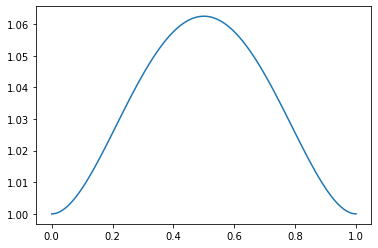

In [ ]:
"""première méthode"""
xs=np.linspace(0,1,100)
ys=[]
for x in xs:
    ys.append(f(x))
plt.plot(xs,ys);

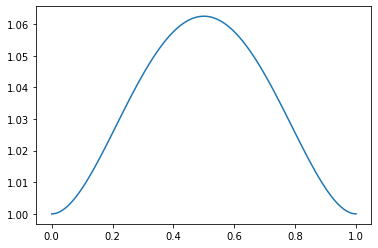

In [ ]:
""" seconde méthode"""
plt.plot(xs,f(xs));

La seconde méthode est plus élégante mais aussi beaucoup plus rapide.

Par contre, considérons la fonction:

In [ ]:
def g(x):
    if 0<x<0.5: return x
    elif 0.5<x<2: return 2*x
    else : return 0

Cette fonction `g` ne fonctionne pas quand `x` est un tenseur numpy (essayez $(1\heartsuit)$, observez le message d'erreur, vous le rencontrerez sans doute plus tard). On peut transformer cette fonction pour quelle marche avec `numpy` mais c'est un peu technique. 

Le conseil: dans un premier temps, ne vous prenez pas trop la tête. Faites au plus simple même si ce n'est pas le plus performant. Vous apprendrez les astuces au fur et à mesure. 

## Sous le capot de numpy $\flat$



### Des données à plats. 

Peu importe la `shape` ou le `dtype` (=data_type): dans la mémoire, les tableaux `numpy` sont stockés sous la forme d'un tableau 1D, par paquets-de-8bits. Quand vous changer la `shape`, les données ne change pas du tout, c'est uniquement la façon de les parcourir qui change. 

In [ ]:
" ces 4 objets sont associées aux même données toutes plates."
vec=np.arange(0,9,1)
print("vec\n",vec)
mat_square=vec.reshape([3,3])
print("mat_square\n",mat_square)
mat_col=mat_square.reshape([9,1])
print("mat_col\n",mat_col)
mat_line=mat_square.reshape([1,9])
print("mat_line\n",mat_line)

vec
 [0 1 2 3 4 5 6 7 8]
mat_square
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
mat_col
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
mat_line
 [[0 1 2 3 4 5 6 7 8]]


### l'attribut 'strides'

Quand on change la `shape`, on chage aussi l'attribut `strides`: il indique comment on passe d'une case à l'autre.



### ex:  vecteur 

Dans ce cas,  `strides` est un scalaire: il indique de combien de paquet-de-8bits il faut glisser pour aller de `vec[i]` à `vec[i+1]`. Cela dépend uniquement du `dtype`

In [ ]:
a=np.zeros(shape=5,dtype=np.uint8)
print("np.uint8, strides:",a.strides)
a=np.zeros(shape=5,dtype=np.int32)
print("np.int32, strides:",a.strides)
a = np.zeros(shape=5, dtype=np.int64)
print("np.int64, strides:",a.strides)

np.uint8, strides: (1,)
np.int32, strides: (4,)
np.int64, strides: (8,)


### ex:  matrice

Dans ce cas,  `strides` est une paire. 

* `strides[0]` indique de combien de paquet-de-8bits il faut glisser pour passer de la case `mat[i,j]` à la case `mat[i+1,j]` 
* `strides[1]` indique de combien de paquet-de-8bits il faut glisser pour passer de la case ``mat[i,j]`` à la case ``mat[i,j+1]``

Illustrons cela avec uniquement `dtype=np.uint8`. 

In [ ]:
a = np.zeros(shape=(2,4), dtype=np.uint8)
print("shape=(2,4), strides:", a.strides)

a = np.zeros(shape=(30, 5), dtype=np.uint8)
print("shape=(30,4), strides:", a.strides)

shape=(2,4), strides: (4, 1)
shape=(30,4), strides: (5, 1)


***A vous:*** Essayez de répondres à ces 3 questions sans faire de `print` $(3\diamondsuit)$ puis avec un `print` $(3\heartsuit)$. 

* quelle est la stride de `np.zeros(shape=(2,4), dtype=np.int32)`
* quelle est la stride de `np.zeros(shape=(30,5), dtype=np.int32)`
* A quoi correspond la stride d'un tenseur de dimension 3.